Each row corresponds to one client, an instance, and columns are features of this instance.

Row represents entries.

Columns represents features of this entries.

Usage:

    train = pd.readcsv("train.csv")
    train["one_feature"].

In [92]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [93]:
import pandas as pd

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
%ls

BasicsofPython.ipynb        README.md
Cadabra.ipynb               ScipyEcosystem.ipynb
Index.ipynb                 WhythereisJupyterNB.ipynb
IntroMonteCarlo/            ZenOfPython.ipynb
ListInternals.ipynb         data/
MachineLearning.ipynb       firsttryonKaggle.ipynb
Project-requirements.ipynb  kernel.ipynb
Python3Skeleton.ipynb       root.ipynb


In [96]:
%ls data/

athlete_events.csv  test.csv            train.csv


In [97]:
%pwd

'/Users/kylewong/Playground/IPython_Takeoff'

In [98]:
atheletes_events = pd.read_csv("data/athlete_events.csv")

In [99]:
atheletes_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [100]:
atheletes_events.describe(include = ['object','bool'])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


NumPy arrays are stored as contiguous blocks of memory. They usually have a single datatype (e.g. integers, floats or fixed-length strings) and then the bits in memory are interpreted as values with that datatype.

Creating an array with `dtype=object` is different. The memory taken by the array now is filled with *pointers* to Python objects which are being stored *elsewhere* in memory (much like a Python `list` is really just a list of pointers to objects, not the objects themselves).

Arithmetic operators such as `*` don't work with arrays such as `ar1` which have a `string_` datatype (there are special functions instead - see below). NumPy is just treating the bits in memory as characters and the `*` operator doesn't make sense here. However, the line

    np.array(['avinash','jay'], dtype=object) * 2

works because now the array is an array of (pointers to) Python strings. The `*` operator is well defined for these Python string objects. New Python strings are created in memory and a new `object` array with references to the new strings is returned.


----------


If you have an array with `string_` or `unicode_` dtype and want to repeat each string, you can use `np.char.multiply`:

    In [52]: np.char.multiply(ar1, 2)
    Out[52]: array(['avinashavinash', 'jayjay'], 
          dtype='<U14')

NumPy has many other [vectorised string methods](http://docs.scipy.org/doc/numpy/reference/generated/numpy.chararray.html) too.

In [101]:
atheletes_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [102]:
atheletes_events.Age

0         24.0
1         23.0
2         24.0
3         34.0
4         21.0
5         21.0
6         25.0
7         25.0
8         27.0
9         27.0
10        31.0
11        31.0
12        31.0
13        31.0
14        33.0
15        33.0
16        33.0
17        33.0
18        31.0
19        31.0
20        31.0
21        31.0
22        33.0
23        33.0
24        33.0
25        33.0
26        18.0
27        18.0
28        26.0
29        26.0
          ... 
271086    23.0
271087    19.0
271088    19.0
271089    34.0
271090    38.0
271091    32.0
271092    21.0
271093    21.0
271094    25.0
271095    25.0
271096    29.0
271097    29.0
271098    33.0
271099    36.0
271100    26.0
271101    24.0
271102    19.0
271103    23.0
271104    22.0
271105    23.0
271106    27.0
271107    21.0
271108    24.0
271109    28.0
271110    33.0
271111    29.0
271112    27.0
271113    27.0
271114    30.0
271115    34.0
Name: Age, Length: 271116, dtype: float64

In [103]:
atheletes_events.shape
atheletes_events.columns

(271116, 15)

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [104]:
atheletes_events.Sex.value_counts();

In [105]:
atheletes_events.Age.value_counts();

In [106]:
atheletes_events.sort_values(by = 'Age', ascending = True).head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


In [107]:
atheletes_events.sort_values(by = ['Age', 'Height'] , ascending = [True,True]).head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze
101378,51268,Beatrice Hutiu,F,11.0,151.0,38.0,Romania,ROU,1968 Winter,1968,Winter,Grenoble,Figure Skating,Figure Skating Women's Singles,NaN
43468,22411,Magdalena Cecilia Colledge,F,11.0,152.0,NaN,Great Britain,GBR,1932 Winter,1932,Winter,Lake Placid,Figure Skating,Figure Skating Women's Singles,NaN
94058,47618,"Sonja Henie (-Topping, -Gardiner, -Onstad)",F,11.0,155.0,45.0,Norway,NOR,1924 Winter,1924,Winter,Chamonix,Figure Skating,Figure Skating Women's Singles,NaN
237141,118925,Megan Olwen Devenish Taylor (-Mandeville-Ellis),F,11.0,157.0,NaN,Great Britain,GBR,1932 Winter,1932,Winter,Lake Placid,Figure Skating,Figure Skating Women's Singles,NaN


In [108]:
atheletes_events.sort_values(by = ['Age', 'Sex'] , ascending = [True,True]).head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze
43468,22411,Magdalena Cecilia Colledge,F,11.0,152.0,NaN,Great Britain,GBR,1932 Winter,1932,Winter,Lake Placid,Figure Skating,Figure Skating Women's Singles,NaN
79024,40129,Luigina Giavotti,F,11.0,NaN,NaN,Italy,ITA,1928 Summer,1928,Summer,Amsterdam,Gymnastics,Gymnastics Women's Team All-Around,Silver
94058,47618,"Sonja Henie (-Topping, -Gardiner, -Onstad)",F,11.0,155.0,45.0,Norway,NOR,1924 Winter,1924,Winter,Chamonix,Figure Skating,Figure Skating Women's Singles,NaN
101378,51268,Beatrice Hutiu,F,11.0,151.0,38.0,Romania,ROU,1968 Winter,1968,Winter,Grenoble,Figure Skating,Figure Skating Women's Singles,NaN


In [109]:
atheletes_events['Year'];
atheletes_events['Sex'].value_counts()

0         1992
1         2012
2         1920
3         1900
4         1988
5         1988
6         1992
7         1992
8         1994
9         1994
10        1992
11        1992
12        1992
13        1992
14        1994
15        1994
16        1994
17        1994
18        1992
19        1992
20        1992
21        1992
22        1994
23        1994
24        1994
25        1994
26        1932
27        1932
28        2002
29        1952
          ... 
271086    2006
271087    1980
271088    1980
271089    2008
271090    2012
271091    2012
271092    1994
271093    1994
271094    1998
271095    1998
271096    2002
271097    2002
271098    2006
271099    2004
271100    1928
271101    1972
271102    2000
271103    2004
271104    2002
271105    2000
271106    2004
271107    1972
271108    2000
271109    2004
271110    2016
271111    1976
271112    2014
271113    2014
271114    1998
271115    2002
Name: Year, Length: 271116, dtype: int64

M    196594
F     74522
Name: Sex, dtype: int64

In [110]:
atheletes_events[atheletes_events['Year']==1996].sort_values(by = 'Age'  , ascending = True).head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
93850,47506,Hem Reaksmey,F,12.0,175.0,65.0,Cambodia,CAM,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Women's 100 metres Breaststroke,NaN
33105,17045,Byeon Hye-Yeong,F,13.0,166.0,61.0,South Korea,KOR,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Women's 100 metres Breaststroke,NaN


In [111]:
atheletes_events[atheletes_events['Year']==1996].Age.min()

12.0

1.How old were the youngest male and female participants of the 1996 Olympics?  B
* 16 and 15
* 14 and 12
* 16 and 12
* 13 and 11

In [112]:
atheletes_events[atheletes_events['Year']==1996].sort_values(by = ['Sex','Age' ] , ascending = [False,True]).head(1)
atheletes_events[atheletes_events['Year']==1996].sort_values(by = ['Sex','Age' ] , ascending = [True,True]).head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
87416,44326,Gwon Gyeong-Min,M,14.0,165.0,60.0,South Korea,KOR,1996 Summer,1996,Summer,Atlanta,Diving,Diving Men's Platform,NaN


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
93850,47506,Hem Reaksmey,F,12.0,175.0,65.0,Cambodia,CAM,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Women's 100 metres Breaststroke,NaN


2.What was the percentage of male gymnasts among all the male participants of the 2000 Olympics? Round the answer to the first decimal.

Hint: here and further if needed drop duplicated sportsmen to count only unique ones.

* 0.2
* 1.5
* 2.5
* 7.7

In [ ]:
atheletes_events[[]]
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [91]:
atheletes_events[atheletes_events['Sex']=='M'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196594 entries, 0 to 271115
Data columns (total 15 columns):
ID        196594 non-null int64
Name      196594 non-null object
Sex       196594 non-null object
Age       187544 non-null float64
Height    143567 non-null float64
Weight    141470 non-null float64
Team      196594 non-null object
NOC       196594 non-null object
Games     196594 non-null object
Year      196594 non-null int64
Season    196594 non-null object
City      196594 non-null object
Sport     196594 non-null object
Event     196594 non-null object
Medal     28530 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 24.0+ MB


Text(0.5,159,'Summer Game Year')

Text(159,0.5,'Sport')

Text(0.5,1,'[Heatmap] Number of events in each sport over years')

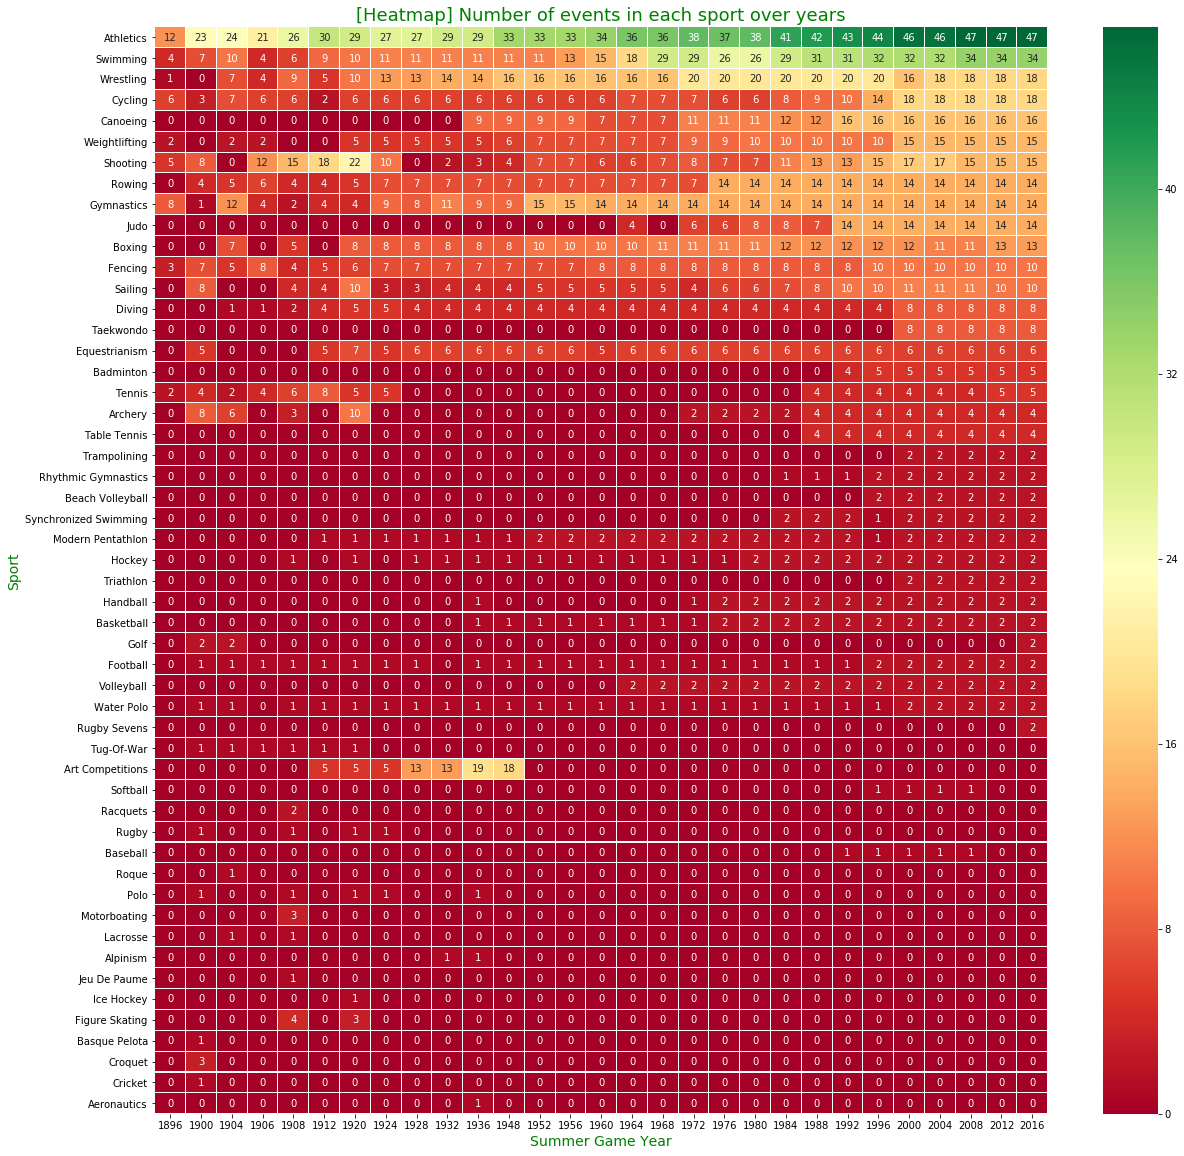

In [36]:
sport_year = atheletes_events[atheletes_events['Season']=='Summer'].pivot_table(atheletes_events, index=['Year','Sport'], aggfunc=lambda x: len(x.unique())).reset_index()[['Year','Sport','Event']]
sport_year = sport_year.pivot("Sport", "Year", "Event")
sport_year.fillna(0,inplace=True)
sport_year = sport_year.reindex(sport_year.sort_values(by=2016, ascending=False).index)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(sport_year, annot=True, linewidths=0.05, ax=ax, cmap="RdYlGn")
ax.set_xlabel('Summer Game Year', size=14, color="green")
ax.set_ylabel('Sport', size=14, color="green")
ax.set_title('[Heatmap] Number of events in each sport over years', size=18, color="green")
plt.show()